In this notebook the Yelp hotel reviews are narrowed down to resort casinos on the Las Vegas Strip. Outliers are checked for, and exploratory analysis begins by taking a look at the information surrounding review counts, text length, variable correlations, and the most frequent terms appearing in the review data.

In [1]:
#import packages
%matplotlib inline
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import seaborn as sns

sns.set()

In [2]:
#import hotel reviews into a dataframe
df = pd.read_csv('yelp_reviews_hotels1.csv')

C:\Users\Danny\Miniconda2\envs\soccer\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290792 entries, 0 to 290791
Data columns (total 24 columns):
Unnamed: 0      290792 non-null int64
business_id     290792 non-null object
cool            290792 non-null int64
date            290792 non-null object
funny           290792 non-null int64
review_id       290792 non-null object
stars_x         290792 non-null int64
text            290792 non-null object
useful          290792 non-null int64
user_id         290792 non-null object
address         284413 non-null object
attributes      290792 non-null object
categories      290792 non-null object
city            290787 non-null object
hours           290792 non-null object
is_open         290792 non-null int64
latitude        290792 non-null object
longitude       290792 non-null object
name            290792 non-null object
neighborhood    177882 non-null object
postal_code     290404 non-null object
review_count    290792 non-null int64
stars_y         290792 non-null float6

In [4]:
#clean up data frame
df.drop(['Unnamed: 0', 'attributes','city', 'state', 'postal_code', 'longitude', 'latitude'], axis=1, inplace=True)
df.rename(columns={'stars_x': 'review_rating'}, inplace=True)
df.rename(columns={'stars_y': 'company_rating'}, inplace=True)
df.set_index('review_id', inplace=True)
df= df.fillna('Not Available')

In [5]:
#add text length column
df['text_length'] = df['text'].apply(len)

In [6]:
#filter hotel reviews so they only cantain Casino Resorts on the Las Vegas Strip
hotels = df[df.neighborhood =='The Strip'] 
res_casino = df[df.name.str.contains('Casino')]

### Check for outliers

In [7]:
#Any companies with 0 reviews?
print(res_casino.review_count.describe())

#Any ratings outside of 1-5 stars?
print(res_casino.company_rating.describe())
print(res_casino.review_rating.describe())

count    61634.000000
mean      2034.822647
std       1139.299752
min          3.000000
25%       1008.000000
50%       2175.000000
75%       2818.000000
max       4041.000000
Name: review_count, dtype: float64
count    61634.000000
mean         2.877998
std          0.432810
min          1.500000
25%          2.500000
50%          3.000000
75%          3.000000
max          5.000000
Name: company_rating, dtype: float64
count    61634.000000
mean         2.912272
std          1.428361
min          1.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: review_rating, dtype: float64


In [8]:
#Each review should be marked 1 under cool if it got a cool vote, same with useful and funny. Are there only 1's or 0's?
print(res_casino.cool.describe())
print(res_casino.funny.describe())
print(res_casino.useful.describe())

count    61634.000000
mean         0.691437
std          3.025856
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max        203.000000
Name: cool, dtype: float64
count    61634.000000
mean         0.816481
std          2.881646
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max        186.000000
Name: funny, dtype: float64
count    61634.000000
mean         1.675228
std          3.953784
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max        215.000000
Name: useful, dtype: float64


In [9]:
#Any one or two word reviews included?

res_casino.text_length.describe()


count    61634.000000
mean       863.974608
std        765.994082
min         15.000000
25%        350.000000
50%        630.500000
75%       1118.000000
max       5000.000000
Name: text_length, dtype: float64

### Exploring the data

In [10]:
len(res_casino)

61634

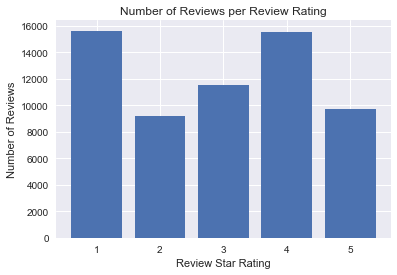

In [11]:
#look at the number of reviews per review rating
reviews = res_casino.groupby('review_rating').count()
plt.bar(reviews.index, reviews.review_count)
plt.title('Number of Reviews per Review Rating')
plt.xlabel('Review Star Rating')
plt.ylabel('Number of Reviews')
plt.show()

In [12]:
reviews

,business_id,cool,date,funny,text,useful,user_id,address,categories,hours,is_open,name,neighborhood,review_count,company_rating,text_length
review_rating,,,,,,,,,,,,,,,,
1,15639,15639,15639,15639,15639,15639,15639,15639,15639,15639,15639,15639,15639,15639,15639,15639
2,9159,9159,9159,9159,9159,9159,9159,9159,9159,9159,9159,9159,9159,9159,9159,9159
3,11543,11543,11543,11543,11543,11543,11543,11543,11543,11543,11543,11543,11543,11543,11543,11543
4,15556,15556,15556,15556,15556,15556,15556,15556,15556,15556,15556,15556,15556,15556,15556,15556
5,9737,9737,9737,9737,9737,9737,9737,9737,9737,9737,9737,9737,9737,9737,9737,9737


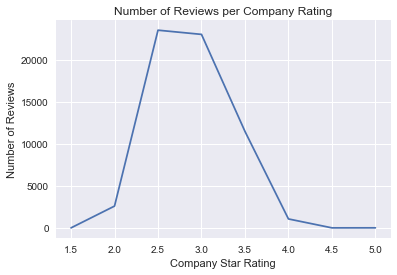

In [13]:
#look at the number of reviews per company rating
co_reviews = res_casino.groupby('company_rating').count()
plt.plot(co_reviews.index, co_reviews.review_count)
plt.title('Number of Reviews per Company Rating')
plt.xlabel('Company Star Rating')
plt.ylabel('Number of Reviews')
plt.show()

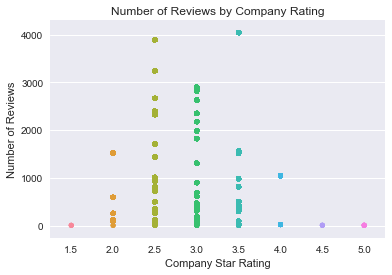

In [14]:
sns.stripplot(x='company_rating', y='review_count', data=res_casino)
plt.title('Number of Reviews by Company Rating')
plt.xlabel('Company Star Rating')
plt.ylabel('Number of Reviews')
plt.show()

In [15]:
co_reviews

,business_id,cool,date,funny,review_rating,text,useful,user_id,address,categories,hours,is_open,name,neighborhood,review_count,text_length
company_rating,,,,,,,,,,,,,,,,
1.5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
2.0,2593,2593,2593,2593,2593,2593,2593,2593,2593,2593,2593,2593,2593,2593,2593,2593
2.5,23493,23493,23493,23493,23493,23493,23493,23493,23493,23493,23493,23493,23493,23493,23493,23493
3.0,22995,22995,22995,22995,22995,22995,22995,22995,22995,22995,22995,22995,22995,22995,22995,22995
3.5,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467
4.0,1065,1065,1065,1065,1065,1065,1065,1065,1065,1065,1065,1065,1065,1065,1065,1065
4.5,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
5.0,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10


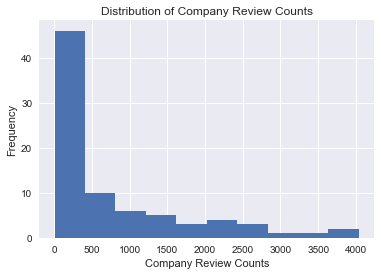

In [16]:
#look at the distribution of company review counts
companies = res_casino.groupby('business_id').count()
plt.hist(companies.review_count)
plt.title('Distribution of Company Review Counts')
plt.xlabel('Company Review Counts')
plt.ylabel('Frequency')
plt.show()

In [17]:
companies.review_count.describe()

count      81.000000
mean      760.913580
std       990.829264
min         3.000000
25%        48.000000
50%       334.000000
75%      1008.000000
max      4041.000000
Name: review_count, dtype: float64

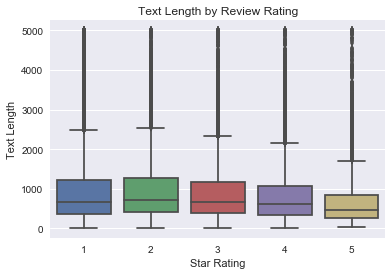

In [18]:
#look at how text length differs for different review ratings
sns.boxplot(x='review_rating', y='text_length', data=res_casino)
plt.title('Text Length by Review Rating')
plt.xlabel('Star Rating')
plt.ylabel('Text Length')
plt.show()

In [19]:
res_casino.text_length.describe()

count    61634.000000
mean       863.974608
std        765.994082
min         15.000000
25%        350.000000
50%        630.500000
75%       1118.000000
max       5000.000000
Name: text_length, dtype: float64

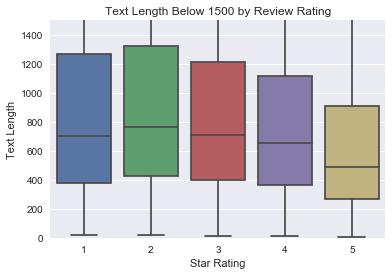

In [20]:
#zoom in to get a better look 
sns.boxplot(x='review_rating', y='text_length', data=hotels)
plt.title('Text Length Below 1500 by Review Rating')
plt.xlabel('Star Rating')
plt.ylabel('Text Length')
plt.ylim(0,1500)
plt.show()

In [21]:
#take a closer look at two star reviews
star2 = res_casino[res_casino.review_rating ==2]
star2.text_length.describe()

count    9159.000000
mean      970.104487
std       812.333436
min        24.000000
25%       414.000000
50%       727.000000
75%      1265.500000
max      5000.000000
Name: text_length, dtype: float64

In [22]:
#group data by review rating
by_rev_rating = res_casino.groupby('review_rating').mean()

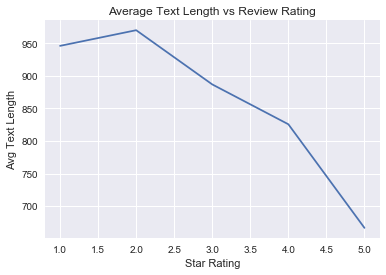

In [23]:
#look at average text length across different review ratings
plt.plot(by_rev_rating.index, by_rev_rating.text_length)
plt.title('Average Text Length vs Review Rating')
plt.xlabel('Star Rating')
plt.ylabel('Avg Text Length')
plt.show()

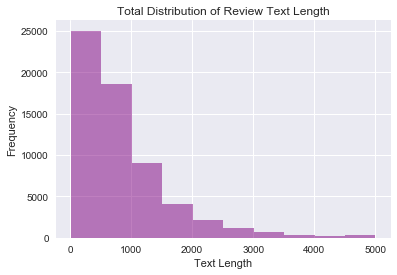

In [24]:
#look at the distribution of text lengths for all reviews
plt.hist(res_casino.text_length, color='purple', alpha=.5)
plt.title('Total Distribution of Review Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [25]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = float(len(data))

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

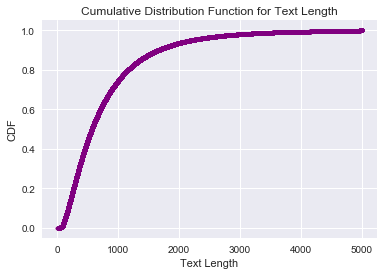

In [26]:
#plot cdf for text length
x,y = ecdf(df.text_length)

plt.plot(x, y, marker='.', linestyle='none', color='purple')
plt.xlabel('Text Length')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function for Text Length')
plt.show()

In [27]:
#break up the reviews into low, middle, and high rating groups
low_rating = res_casino[res_casino.review_rating < 3]
middle_rating = res_casino[res_casino.review_rating==3]
high_rating = res_casino[res_casino.review_rating > 3]

print(len(low_rating))
print(len(middle_rating))
print(len(high_rating))


24798
11543
25293


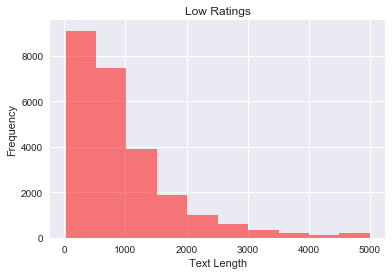

In [28]:
#look at the distribution of text lengths for low rating reviews
plt.hist(low_rating.text_length, color='red', alpha=.5)
plt.title('Low Ratings')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

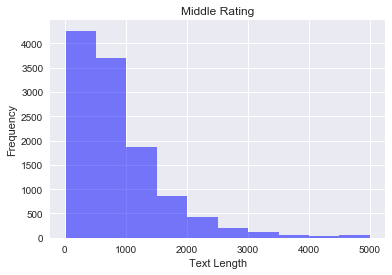

In [29]:
#look at the distribution of text lengths for middle rating reviews
plt.hist(middle_rating.text_length, color='blue', alpha=.5)
plt.title('Middle Rating')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

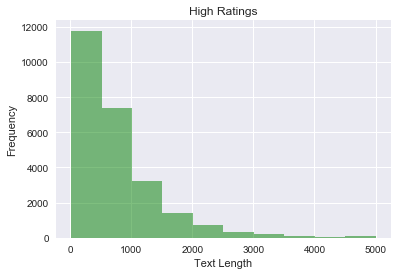

In [30]:
#look at the distribution of text lengths for high rating reviews
plt.hist(high_rating.text_length, color='green', alpha=.5)
plt.title('High Ratings')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

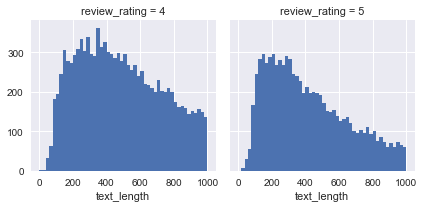

In [31]:
#look at the distributions of text length for 4 and 5 star ratings individually
high = sns.FacetGrid(data=high_rating, col='review_rating')
high.map(plt.hist, 'text_length', bins=50, range=[0,1000])
plt.show()

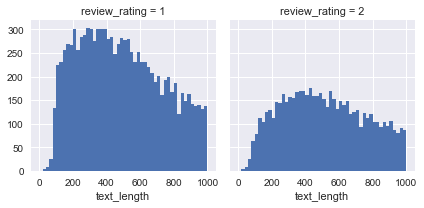

In [32]:
#look at the distributions of text length for 1 and 2 star ratings individually
low = sns.FacetGrid(data=low_rating, col='review_rating')
low.map(plt.hist, 'text_length', bins=50, range=[0,1000])
plt.show()

In [33]:
#group the data by company rating
by_co_rating = res_casino.groupby('company_rating').mean()

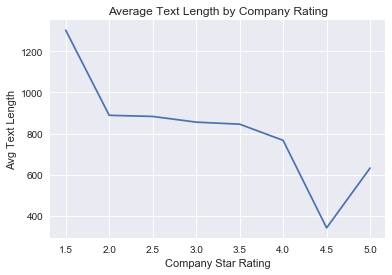

In [34]:
#look at how the average text length changes for different company ratings
plt.plot(by_co_rating.index, by_co_rating.text_length)
plt.title('Average Text Length by Company Rating')
plt.xlabel('Company Star Rating')
plt.ylabel('Avg Text Length')
plt.show()

In [35]:
#look at who the highest rated competitors are
rivals = res_casino.groupby('name').mean()
rivals.review_count.describe()

count      80.000000
mean      770.219318
std       993.217078
min         3.000000
25%        63.000000
50%       340.500000
75%      1017.000000
max      4041.000000
Name: review_count, dtype: float64

In [36]:
big_rivals = rivals[rivals.review_count > 1000]
big_rivals.sort_values('company_rating', ascending=False)

,cool,funny,review_rating,useful,is_open,review_count,company_rating,text_length
name,,,,,,,,
M Resort Spa Casino,0.864943,0.793103,3.946360,1.589080,1.0,1044.0,4.0,771.402299
ARIA Resort & Casino,0.731502,0.816382,3.492947,1.663202,1.0,4041.0,3.5,987.181886
"South Point Hotel, Casino & Spa",0.564729,0.588507,3.422721,1.449802,1.0,1514.0,3.5,731.210040
Red Rock Casino Resort & Spa,0.793610,0.735463,3.594249,1.804473,1.0,1564.0,3.5,831.402556
Caesars Palace Las Vegas Hotel & Casino,0.870526,0.863290,3.186976,1.631759,1.0,2627.0,3.0,841.004950
Hard Rock Hotel & Casino,0.738631,0.760680,3.030776,1.602205,1.0,2175.0,3.0,962.060634
Mandalay Bay Resort & Casino,0.861629,0.821256,3.245687,1.597308,1.0,2898.0,3.0,899.205314
Bally's Las Vegas Hotel & Casino,0.605711,0.783635,2.878638,1.719385,1.0,1821.0,3.0,844.846787
New York New York Hotel & Casino,0.779516,0.745711,3.232089,1.436428,1.0,1982.0,3.0,801.771443


In [37]:
top_rivals = big_rivals[big_rivals.company_rating >=3.5]

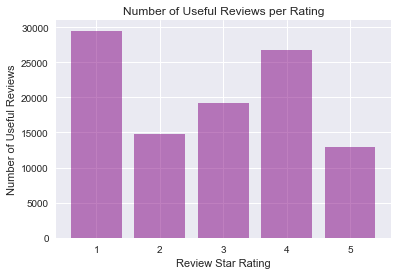

In [38]:
#look at how the 'useful' count compares between review ratings
rratings = res_casino.groupby('review_rating').sum()

plt.bar(rratings.index, rratings.useful, color='purple', alpha=.5)
plt.title('Number of Useful Reviews per Rating')
plt.xlabel('Review Star Rating')
plt.ylabel('Number of Useful Reviews')
plt.show()



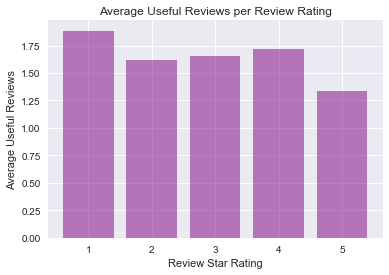

In [39]:
#does this change when we look at avg useful rating?
avg_ratings = res_casino.groupby('review_rating').mean()

plt.bar(avg_ratings.index, avg_ratings.useful, color='purple', alpha=.5)
plt.title('Average Useful Reviews per Review Rating')
plt.xlabel('Review Star Rating')
plt.ylabel('Average Useful Reviews')
plt.show()

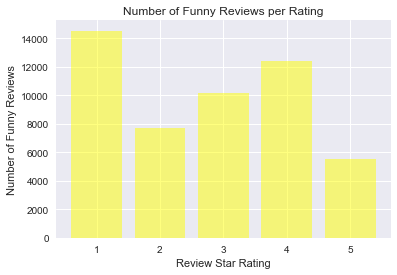

In [40]:
#look at how the 'funny' count compares between review ratings

plt.bar(rratings.index, rratings.funny, color='yellow', alpha=.5)
plt.title('Number of Funny Reviews per Rating')
plt.xlabel('Review Star Rating')
plt.ylabel('Number of Funny Reviews')
plt.show()


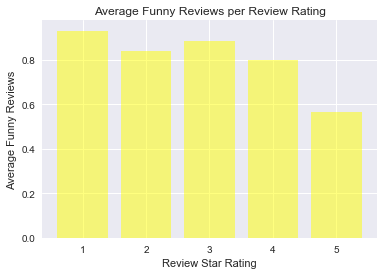

In [41]:
#how does this change when we look at avg funny rating?
plt.bar(avg_ratings.index, avg_ratings.funny, color='yellow', alpha=.5)
plt.title('Average Funny Reviews per Review Rating')
plt.xlabel('Review Star Rating')
plt.ylabel('Average Funny Reviews')
plt.show()

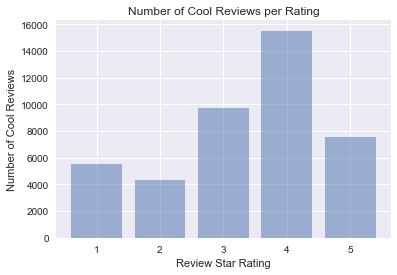

In [42]:
#look at how the 'cool' count compares between review ratings

plt.bar(rratings.index, rratings.cool, alpha=.5)
plt.title('Number of Cool Reviews per Rating')
plt.xlabel('Review Star Rating')
plt.ylabel('Number of Cool Reviews')
plt.show()

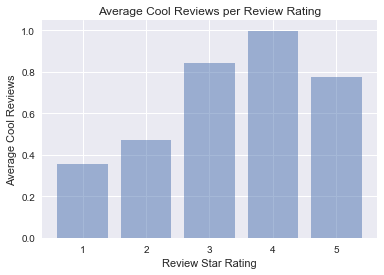

In [43]:
#how does this change when we look at avg cool rating?
plt.bar(avg_ratings.index, avg_ratings.cool, alpha=.5)
plt.title('Average Cool Reviews per Review Rating')
plt.xlabel('Review Star Rating')
plt.ylabel('Average Cool Reviews')
plt.show()

In [44]:
rratings.head()

,cool,funny,useful,is_open,review_count,company_rating,text_length
review_rating,,,,,,,
1,5544,14542,29489,13685,31164659,42794.0,14795265
2,4307,7675,14830,7848,19155393,25397.0,8885187
3,9699,10191,19132,9995,23651985,32779.5,10236609
4,15513,12415,26806,14260,31527311,46317.0,12843412
5,7553,5500,12994,9288,19914911,30095.0,6489738


In [45]:
#group data by review rating and see how the variables correlate with one another
stars = res_casino.groupby('review_rating').mean()
stars.corr()

,cool,funny,useful,is_open,review_count,company_rating,text_length
cool,1.000000,-0.397303,-0.353406,0.515069,0.059594,0.719628,-0.588098
funny,-0.397303,1.000000,0.914766,-0.880053,-0.229005,-0.903726,0.917866
useful,-0.353406,0.914766,1.000000,-0.635366,-0.529101,-0.758263,0.775828
is_open,0.515069,-0.880053,-0.635366,1.000000,-0.214207,0.940796,-0.953881
review_count,0.059594,-0.229005,-0.529101,-0.214207,1.000000,0.033613,0.073428
company_rating,0.719628,-0.903726,-0.758263,0.940796,0.033613,1.000000,-0.965836
text_length,-0.588098,0.917866,0.775828,-0.953881,0.073428,-0.965836,1.000000


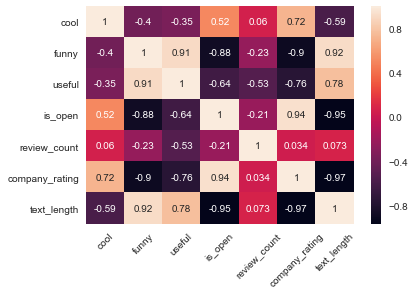

In [46]:
#create a heatmap for the different correlations
sns.heatmap(data=stars.corr(), annot=True)
plt.xticks(rotation=45)
plt.show()

### Most common words

In [47]:
#find most common words in 1 and 5 star reviews

In [48]:
five = res_casino.text[df.review_rating == 5]
one = res_casino.text[df.review_rating == 1]

In [49]:
fivestr = five.str.cat()
onestr = one.str.cat()

In [50]:
from collections import Counter
from nltk.tokenize import word_tokenize

# Tokenize the article: tokens
tokens5 = word_tokenize(fivestr)

# Convert the tokens into lowercase: lower_tokens
lower_tokens5 = [t.lower() for t in tokens5]

# Create a Counter with the lowercase tokens: bow_simple
bow_simple = Counter(lower_tokens)

# Print the 10 most common tokens
print(bow_simple.most_common(10))

In [51]:
# Tokenize the article: tokens
tokens1 = word_tokenize(onestr)

# Convert the tokens into lowercase: lower_tokens
lower_tokens1 = [t.lower() for t in tokens1]

In [52]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
stop_words.update(['hotel', 'stay', 'stayed', 'one', 'get', 'u'])

# Retain alphabetic words: alpha_only
alpha_only5 = [t for t in lower_tokens5 if t.isalpha()]

# Remove all stop words: no_stops
no_stops5 = [t  for t in alpha_only5 if t not in stop_words]

# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize all tokens into a new list: lemmatized
lemmatized5 = [wordnet_lemmatizer.lemmatize(t) for t in no_stops5]

# Create the bag-of-words: bow
bow5 = Counter(lemmatized5)



In [53]:
# Retain alphabetic words: alpha_only
alpha_only1 = [t for t in lower_tokens1 if t.isalpha()]

# Remove all stop words: no_stops
no_stops1 = [t  for t in alpha_only1 if t not in stop_words]

# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize all tokens into a new list: lemmatized
lemmatized1 = [wordnet_lemmatizer.lemmatize(t) for t in no_stops1]

# Create the bag-of-words: bow
bow1 = Counter(lemmatized1)

In [54]:
# Print the 20 most commone tokens
print('For 5 Star Reviews: ', bow5.most_common(20))

print('')

print('For 1 Star Reviews: ', bow1.most_common(20))

For 5 Star Reviews:  [('room', 12682), ('great', 6674), ('vega', 5574), ('casino', 5326), ('time', 4881), ('place', 4852), ('strip', 4333), ('nice', 4164), ('like', 3671), ('pool', 3541), ('good', 3392), ('service', 3055), ('clean', 2937), ('really', 2820), ('go', 2760), ('night', 2703), ('also', 2677), ('love', 2652), ('staff', 2607), ('would', 2590)]

For 1 Star Reviews:  [('room', 35613), ('would', 11210), ('u', 9969), ('time', 9059), ('like', 8438), ('place', 7414), ('service', 7353), ('night', 7160), ('even', 7115), ('never', 7000), ('back', 6964), ('could', 6954), ('told', 6389), ('go', 6313), ('desk', 6254), ('said', 6202), ('day', 5960), ('got', 5897), ('front', 5845), ('check', 5720)]


In [55]:
#Find most common words for positive reviews in the top rivals group
 
tr = top_rivals.merge(res_casino, on='name')
pos_tr = tr[tr.review_rating_y > 3]
trs = pos_tr.text.str.cat()

In [56]:
# Tokenize the article: tokens
tokenstr = word_tokenize(trs)

# Convert the tokens into lowercase: lower_tokens
lower_tokenstr = [t.lower() for t in tokenstr]

In [57]:
# Retain alphabetic words: alpha_only
alpha_onlytr = [t for t in lower_tokenstr if t.isalpha()]

# Remove all stop words: no_stops
no_stopstr = [t  for t in alpha_onlytr if t not in stop_words]

# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize all tokens into a new list: lemmatized
lemmatizedtr = [wordnet_lemmatizer.lemmatize(t) for t in no_stopstr]

# Create the bag-of-words: bow
bowtr = Counter(lemmatizedtr)

In [58]:
# Print the 20 most commone tokens
print('For Top Rival Reviews: ', bowtr.most_common(20))

For Top Rival Reviews:  [('room', 8035), ('great', 3578), ('casino', 3477), ('nice', 3166), ('strip', 3111), ('vega', 2951), ('place', 2857), ('time', 2554), ('like', 2547), ('aria', 2523), ('pool', 2299), ('good', 2284), ('service', 1988), ('would', 1906), ('really', 1903), ('also', 1820), ('restaurant', 1606), ('buffet', 1602), ('food', 1578), ('clean', 1549)]


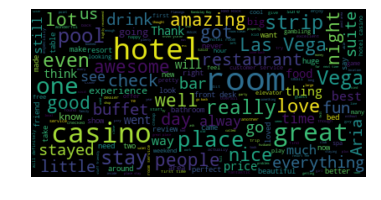

In [59]:
import os

from os import path
from wordcloud import WordCloud

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = fivestr

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

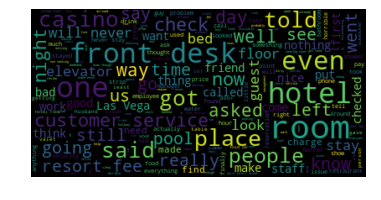

In [60]:
#Create a word cloud for 1 star reviews
text = onestr

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:

wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

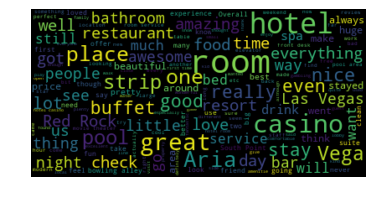

In [61]:
#Create a word cloud for top rival reviews
text = trs

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [62]:
#saving updated dataframe to file
res_casino.to_csv('yelp_reviews_filtered.csv')